In [18]:
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from autorank import autorank, plot_stats, create_report, latex_table
from IPython.display import display, Math, Latex

In [10]:
data = pd.read_csv('scores.csv', index_col=0)

In [11]:
data

,hybrid,svm,logisticregression,randomforest
zeppelin,0.133054,0.116856,0.199931,0.167993
httpcomponents-client,0.057273,0.072920,0.020181,0.074267
ranger,0.150179,0.130244,0.189471,0.135125
kylin,-0.014824,0.061332,0.111094,0.027300
oozie,0.037337,0.054738,0.177865,0.164813
tika,-0.034895,-0.042350,0.118551,0.048275
derby,0.140531,0.093308,0.190061,0.138295
mahout,0.088886,0.023681,0.100511,0.086887
streams,-0.017984,0.093644,0.056400,0.029890
archiva,-0.003903,0.074996,0.105072,-0.007820


In [13]:
result = autorank(data, alpha=0.05, verbose=False)

/usr/local/lib/python3.9/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


In [14]:
print(result)

RankResult(rankdf=
                    meanrank      mean       std   ci_lower   ci_upper  \
logisticregression  1.948718  0.121517  0.073734   0.100305   0.142729   
randomforest        2.423077  0.097702  0.068654  0.0764898   0.118914   
svm                 2.589744  0.089602  0.067194    0.06839   0.110814   
hybrid              3.038462  0.072475  0.078336  0.0512631  0.0936874   

                   effect_size   magnitude  
logisticregression           0  negligible  
randomforest          0.334292       small  
svm                   0.452431       small  
hybrid                0.644687      medium  
pvalue=0.0005297259431103963
cd=None
omnibus=anova
posthoc=tukeyhsd
all_normal=True
pvals_shapiro=[0.031017644330859184, 0.513423502445221, 0.6786174178123474, 0.6620562076568604]
homoscedastic=True
pval_homogeneity=0.773087457620316
homogeneity_test=bartlett
alpha=0.05
alpha_normality=0.0125
num_samples=39
posterior_matrix=
None
decision_matrix=
None
rope=None
rope_mode=None
effect

In [15]:
create_report(result)

The statistical analysis was conducted for 4 populations with 39 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We failed to reject the null hypothesis that the population is normal for all populations (minimal observed p-value=0.031). Therefore, we assume that all populations are normal.
We applied Bartlett's test for homogeneity and failed to reject the null hypothesis (p=0.773) that the data is homoscedastic. Thus, we assume that our data is homoscedastic.
Because we have more than two populations and all populations are normal and homoscedastic, we use repeated measures ANOVA as omnibus test to determine if there are any significant differences between the mean values of the populations. If the results of the ANOVA test are significant, we use the post-hoc Tukey HSD test to infer which differences are significant. We report the mean value (M) and the standard deviation (SD) for each population. Populations are significantly different if their confid

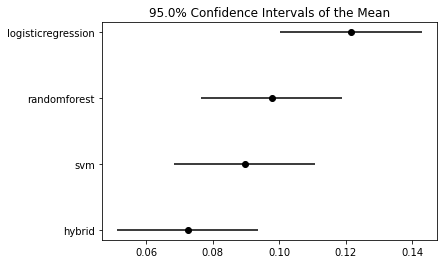

In [16]:
plot_stats(result)
plt.show()

In [17]:
latex_table(result)

\begin{table}[h]
\centering
\begin{tabular}{lrrlll}
\toprule
{} &     M &    SD &              CI &   \$d\$ &   Magnitude \\
\midrule
logisticregression & 0.122 & 0.074 &  [0.100, 0.143] & 0.000 &  negligible \\
randomforest       & 0.098 & 0.069 &  [0.076, 0.119] & 0.334 &       small \\
svm                & 0.090 & 0.067 &  [0.068, 0.111] & 0.452 &       small \\
hybrid             & 0.072 & 0.078 &  [0.051, 0.094] & 0.645 &      medium \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}
